# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [15]:
%matplotlib inline
import scipy.stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

C:\Users\lab\Anaconda2\lib\site-packages\pandas\core\indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


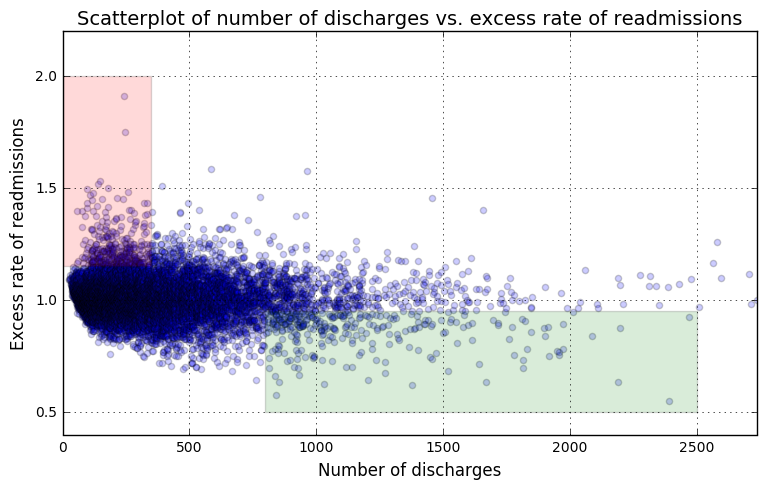

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [ ]:
# Your turn

In [ ]:
#A. The above 'analysis' did not include any analyses, conclusions were drawn from an image without determing
#whether or not there was any real relationship between number of discharges and excess readmission ratio.
#There are also many hospitals with high discharge numbers and high excess readmission ratios and vice versa, 
#that contradict the conclusions and recomendations that were made

In [ ]:
#Null Hypothesis: Number of Discharches does not influence Excess Readmission Ratio
#Alt Hypotheses: Number of Discharches influences Excess Readmission Ratio

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013


In [71]:
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df = clean_hospital_read_df[hospital_read_df['Excess Readmission Ratio'].notnull()]
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')
clean_hospital_read_df = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] > 0]

C:\Users\lab\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [79]:
clean_hospital_read_df.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


In [72]:
# Test to see whether there is a correlation between number of discharges and Excess Readmissions Ratio
# there is a small negative correlation (-0.10) between number of discharges and excess readmission ratio, 
# with an extremely significant pvalue (p < 0.001)
scipy.stats.pearsonr(clean_hospital_read_df['Number of Discharges'], clean_hospital_read_df['Excess Readmission Ratio'])

(-0.097397943510793519, 1.222547377680967e-25)

In [81]:
#Examine whether there is a significant difference in the Excess Readmissions Ratio for hospitals with discharges less than 100 
# and hospitals with discharges over 1000
lowdischarge = clean_hospital_read_df[(clean_hospital_read_df['Number of Discharges'] > 0) & 
                                      (clean_hospital_read_df['Number of Discharges']<= 100)]
highdischarge = clean_hospital_read_df[clean_hospital_read_df['Number of Discharges'] >= 1000]

lowdischarge.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
2580,SAINTS MEDICAL CENTER INC,220082,MA,READM-30-AMI-HRRP,100,NaN,1.0703,20.2,18.9,24.0,07/01/2010,06/30/2013
4439,HURLEY MEDICAL CENTER,230132,MI,READM-30-AMI-HRRP,100,NaN,1.0339,21.1,20.4,23.0,07/01/2010,06/30/2013
8902,SENTARA OBICI HOSPITAL,490044,VA,READM-30-AMI-HRRP,100,NaN,0.9700,18.7,19.3,17.0,07/01/2010,06/30/2013
618,"CLINTON COUNTY HOSPITAL, INC",180106,KY,READM-30-HF-HRRP,100,NaN,1.1575,25.3,21.9,34.0,07/01/2010,06/30/2013
8900,FLORIDA HOSPITAL CARROLLWOOD,100069,FL,READM-30-PN-HRRP,100,NaN,0.9701,15.8,16.3,14.0,07/01/2010,06/30/2013


In [82]:
highdischarge.tail()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8126,NAPLES COMMUNITY HOSPITAL,100018,FL,READM-30-HIP-KNEE-HRRP,2716,NaN,0.9804,5.2,5.3,141.0,07/01/2010,06/30/2013
6643,COMMUNITY MEDICAL CENTER,310041,NJ,READM-30-COPD-HRRP,2740,NaN,1.0003,22.7,22.7,623.0,07/01/2010,06/30/2013
1892,FLORIDA HOSPITAL,100007,FL,READM-30-HF-HRRP,3570,NaN,1.0896,24.5,22.5,879.0,07/01/2010,06/30/2013
13615,NEW ENGLAND BAPTIST HOSPITAL,220088,MA,READM-30-HIP-KNEE-HRRP,3980,NaN,0.7682,3.7,4.8,142.0,07/01/2010,06/30/2013
13666,HOSPITAL FOR SPECIAL SURGERY,330270,NY,READM-30-HIP-KNEE-HRRP,6793,NaN,0.7379,3.9,5.3,258.0,07/01/2010,06/30/2013


In [75]:
scipy.stats.ttest_ind(lowdischarge['Excess Readmission Ratio'], highdischarge['Excess Readmission Ratio'])

Ttest_indResult(statistic=10.029895332413446, pvalue=4.9142568500221855e-23)

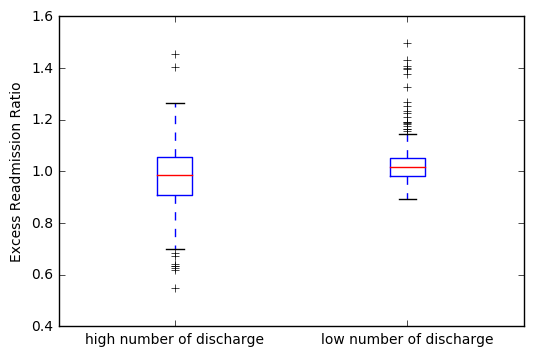

In [131]:
low = lowdischarge['Excess Readmission Ratio']
high = highdischarge['Excess Readmission Ratio']

df = pd.DataFrame({
        "low number of discharge" : low, "high number of discharge" : high
    })


ax = df.plot(kind='box')

ax.set_ylabel('Excess Readmission Ratio')

plt.show()

## Though the averages are quite close, there is a significant increase in 
# Excess Readmission Ratio in hospitals with low discharge numbers (<100)

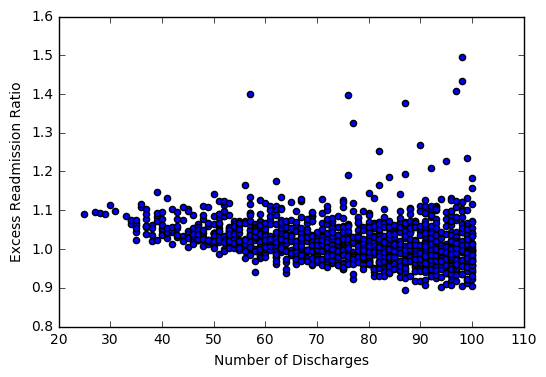

In [148]:
lowdischarge.plot(x = 'Number of Discharges', y='Excess Readmission Ratio', kind='scatter')

## From this plot we see that Excess Readmission Ratio actually seems to increase with number of Discharges

In [156]:
lowdischarge['Measure Name'].value_counts()

READM-30-AMI-HRRP         388
READM-30-HF-HRRP          345
READM-30-COPD-HRRP        285
READM-30-PN-HRRP          192
READM-30-HIP-KNEE-HRRP     13
Name: Measure Name, dtype: int64

In [159]:
lowdischarge[lowdischarge['Measure Name'] == 'READM-30-HIP-KNEE-HRRP'][:5]

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
29,RALEIGH GENERAL HOSPITAL,510070,WV,READM-30-HIP-KNEE-HRRP,57,NaN,1.3992,8.5,6.1,11.0,07/01/2010,06/30/2013
31,SOUTHWEST MS REGIONAL MEDICAL CENTER,250097,MS,READM-30-HIP-KNEE-HRRP,76,NaN,1.3966,8.9,6.3,13.0,07/01/2010,06/30/2013
67,UNIVERSITY OF MD SHORE MEDICAL CTR AT CHESTERTOWN,210030,MD,READM-30-HIP-KNEE-HRRP,77,NaN,1.3254,7.5,5.7,11.0,07/01/2010,06/30/2013
145,DESERT SPRINGS HOSPITAL,290022,NV,READM-30-HIP-KNEE-HRRP,82,NaN,1.2519,8.2,6.6,11.0,07/01/2010,06/30/2013
41,BAYSHORE COMMUNITY HOSPITAL,310112,NJ,READM-30-HIP-KNEE-HRRP,87,NaN,1.3755,10.3,7.5,15.0,07/01/2010,06/30/2013


In [151]:
lowdischarge.sort_values(by = 'Excess Readmission Ratio', ascending = False)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
8,ONSLOW MEMORIAL HOSPITAL,340042,NC,READM-30-HIP-KNEE-HRRP,98,NaN,1.4953,7.9,5.3,15.0,07/01/2010,06/30/2013
19,METROPLEX HOSPITAL,450152,TX,READM-30-HIP-KNEE-HRRP,98,NaN,1.4333,7.6,5.3,14.0,07/01/2010,06/30/2013
24,"SAINT MICHAEL'S MEDICAL CENTER, INC",310096,NJ,READM-30-HIP-KNEE-HRRP,97,NaN,1.4088,9.9,7.0,16.0,07/01/2010,06/30/2013
29,RALEIGH GENERAL HOSPITAL,510070,WV,READM-30-HIP-KNEE-HRRP,57,NaN,1.3992,8.5,6.1,11.0,07/01/2010,06/30/2013
31,SOUTHWEST MS REGIONAL MEDICAL CENTER,250097,MS,READM-30-HIP-KNEE-HRRP,76,NaN,1.3966,8.9,6.3,13.0,07/01/2010,06/30/2013
41,BAYSHORE COMMUNITY HOSPITAL,310112,NJ,READM-30-HIP-KNEE-HRRP,87,NaN,1.3755,10.3,7.5,15.0,07/01/2010,06/30/2013
67,UNIVERSITY OF MD SHORE MEDICAL CTR AT CHESTERTOWN,210030,MD,READM-30-HIP-KNEE-HRRP,77,NaN,1.3254,7.5,5.7,11.0,07/01/2010,06/30/2013
124,"UNIVERSITY OF CINCINNATI MEDICAL CENTER, LLC",360003,OH,READM-30-HIP-KNEE-HRRP,90,NaN,1.2686,7.3,5.8,11.0,07/01/2010,06/30/2013
145,DESERT SPRINGS HOSPITAL,290022,NV,READM-30-HIP-KNEE-HRRP,82,NaN,1.2519,8.2,6.6,11.0,07/01/2010,06/30/2013
200,SAINT JOSEPH REGIONAL MEDICAL CENTER - PLYMOUTH,150076,IN,READM-30-HIP-KNEE-HRRP,99,NaN,1.2348,7.2,5.8,11.0,07/01/2010,06/30/2013


In [ ]:
## We can try to segement the data by other factors to determine whether discharge number is
#the actual driving force behind Excess Readmission Ratios

In [138]:
lowdischarge['State'].value_counts()[:10]

CA    130
TX    109
NY     84
GA     52
FL     51
PA     46
TN     44
IL     44
OK     43
LA     41
Name: State, dtype: int64

In [139]:
highdischarge['State'].value_counts()[:10]

FL    46
MI    35
NC    30
NJ    29
TX    28
IL    27
NY    24
MA    19
TN    19
KY    18
Name: State, dtype: int64

In [140]:
lowexcess = clean_hospital_read_df[(clean_hospital_read_df['Excess Readmission Ratio'] > 0) & 
                                      (clean_hospital_read_df['Excess Readmission Ratio']<= 1)]
highexcess = clean_hospital_read_df[clean_hospital_read_df['Excess Readmission Ratio'] > 1]

In [146]:
lowexcess.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,5558.000000,5558.000000,0.0,5558.000000,5558.000000,5558.000000,5558.000000
mean,260906.968694,381.295250,NaN,0.937418,16.757521,17.775873,56.253688
std,159495.580213,322.753998,NaN,0.054024,4.980086,5.085959,51.592411
min,10001.000000,51.000000,NaN,0.549500,2.700000,3.900000,11.000000
25%,110089.500000,168.000000,NaN,0.912900,15.400000,16.400000,22.000000
50%,250069.000000,294.000000,NaN,0.950550,17.800000,18.800000,39.000000
75%,390167.000000,489.000000,NaN,0.977100,20.100000,21.300000,72.000000
max,670077.000000,6793.000000,NaN,1.000000,26.400000,27.000000,546.000000


In [147]:
highexcess.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,5939.000000,5939.000000,0.0,5939.000000,5939.000000,5939.000000,5939.000000
mean,254450.086715,350.652635,NaN,1.073093,19.132362,17.949756,70.540327
std,149168.664049,294.309479,NaN,0.068862,5.688989,5.380648,65.372409
min,10001.000000,25.000000,NaN,1.000100,4.400000,4.000000,11.000000
25%,110186.000000,151.000000,NaN,1.025800,17.600000,16.800000,27.000000
50%,250031.000000,269.000000,NaN,1.056200,20.300000,19.100000,51.000000
75%,370052.500000,460.500000,NaN,1.097800,22.800000,21.500000,92.000000
max,670082.000000,3570.000000,NaN,1.909500,32.800000,28.000000,879.000000


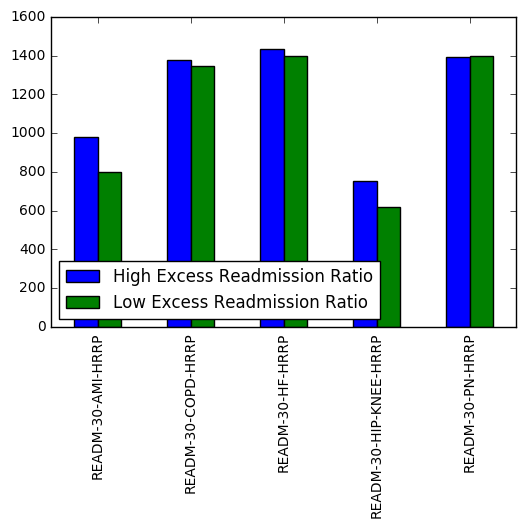

In [222]:

highe= highexcess['Measure Name'].value_counts()[:10]
lowe =lowexcess['Measure Name'].value_counts()[:10]



dfexcess = pd.DataFrame({
        "Low Excess Readmission Ratio" : lowe, "High Excess Readmission Ratio" : highe
    })

ax =dfexcess.plot(kind = 'bar')
ax.legend(loc=3)

## From this figure we see that Measure Names are the same in low and high excess readmission ratios 
## Except those with low excess Readmission rates have fewer AMI (acute myocardial infracion) and Hip-Knee
## measurements

In [14]:
hospital_read_df.head(10)

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
0,FROEDTERT MEMORIAL LUTHERAN HOSPITAL,520177,WI,READM-30-HIP-KNEE-HRRP,242,NaN,1.9095,10.8,5.6,38.0,07/01/2010,06/30/2013
1,PROVIDENCE HOSPITAL,90006,DC,READM-30-HIP-KNEE-HRRP,247,NaN,1.7521,9.2,5.3,33.0,07/01/2010,06/30/2013
2,BEAUFORT COUNTY MEMORIAL HOSPITAL,420067,SC,READM-30-HIP-KNEE-HRRP,586,NaN,1.5836,7.6,4.8,53.0,07/01/2010,06/30/2013
3,ADVOCATE CHRIST HOSPITAL & MEDICAL CENTER,140208,IL,READM-30-HIP-KNEE-HRRP,965,NaN,1.5760,9.0,5.7,95.0,07/01/2010,06/30/2013
4,BRAZOSPORT REGIONAL HEALTH SYSTEM,450072,TX,READM-30-HIP-KNEE-HRRP,149,NaN,1.5308,8.2,5.4,20.0,07/01/2010,06/30/2013
5,WESTERN MISSOURI MEDICAL CENTER,260097,MO,READM-30-HIP-KNEE-HRRP,141,NaN,1.5189,8.1,5.3,19.0,07/01/2010,06/30/2013
6,SAINT AGNES HOSPITAL,210011,MD,READM-30-HIP-KNEE-HRRP,390,NaN,1.5079,7.8,5.2,38.0,07/01/2010,06/30/2013
7,MERCY HOSPITAL JEFFERSON,260023,MO,READM-30-HIP-KNEE-HRRP,178,NaN,1.5019,9.2,6.1,24.0,07/01/2010,06/30/2013
8,ONSLOW MEMORIAL HOSPITAL,340042,NC,READM-30-HIP-KNEE-HRRP,98,NaN,1.4953,7.9,5.3,15.0,07/01/2010,06/30/2013
9,FAUQUIER HOSPITAL,490023,VA,READM-30-HIP-KNEE-HRRP,256,NaN,1.4844,7.4,5.0,26.0,07/01/2010,06/30/2013


In [ ]:
#Null Hypothesis: Readmission Measures do not influence Readmission Ratio
#Alt Hypothesis: Readmission Measures do influence Readmission Ratio

In [ ]:
#To test this hypothesis, I will separate out the readmission measures into 2 groups, AMI and Hip-Knee, and other.
#I will then test to see whether or not there is a significant difference in readmission rate between the hipknee/AMI group and other
#I will then separate out low discharge number and high discharge number rates in other to determine whether the significant 
#difference previously observed holds true. 
#If the null hypothesis is not rejected, than the significant difference in readmission ratios previously observed was due to 
#skewed measure variables rather than discharge numbers.

In [229]:
hipknee = clean_hospital_read_df[(clean_hospital_read_df['Measure Name'] == 'READM-30-HIP-KNEE-HRRP') | (clean_hospital_read_df['Measure Name'] == 'READM-30-AMI-HRRP')]
other = clean_hospital_read_df[(clean_hospital_read_df['Measure Name'] != 'READM-30-HIP-KNEE-HRRP') & (clean_hospital_read_df['Measure Name'] != 'READM-30-AMI-HRRP')]

In [230]:
other['Measure Name'].value_counts()[:10]

READM-30-HF-HRRP      2833
READM-30-PN-HRRP      2789
READM-30-COPD-HRRP    2727
Name: Measure Name, dtype: int64

In [231]:
hipknee['Measure Name'].value_counts()[:10]

READM-30-AMI-HRRP         1777
READM-30-HIP-KNEE-HRRP    1371
Name: Measure Name, dtype: int64

In [232]:
hipknee.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,3148.000000,3148.000000,0.0,3148.000000,3148.000000,3148.000000,3148.000000
mean,253750.395807,386.920584,NaN,1.016338,12.566709,12.390280,38.476175
std,153425.005504,361.939697,NaN,0.126101,6.692387,6.484828,33.181915
min,10001.000000,25.000000,NaN,0.549500,2.700000,3.900000,11.000000
25%,110074.000000,161.000000,NaN,0.945700,5.500000,5.300000,17.000000
50%,240001.500000,291.000000,NaN,1.012700,14.600000,15.400000,27.000000
75%,380051.000000,491.250000,NaN,1.077200,18.200000,17.800000,47.000000
max,670077.000000,6793.000000,NaN,1.909500,30.100000,28.000000,305.000000


In [233]:
other.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,8349.000000,8349.000000,0.0,8349.000000,8349.000000,8349.000000,8349.000000
mean,259012.306983,357.376812,NaN,1.004173,20.026997,19.930207,73.119415
std,154578.052489,285.752808,NaN,0.074911,3.057003,2.530109,64.328459
min,10001.000000,29.000000,NaN,0.699700,11.300000,12.300000,11.000000
25%,110164.000000,159.000000,NaN,0.954900,17.800000,17.800000,30.000000
50%,250082.000000,277.000000,NaN,1.000800,20.000000,20.200000,54.000000
75%,390056.000000,469.000000,NaN,1.050500,22.100000,21.900000,95.000000
max,670082.000000,3570.000000,NaN,1.389200,32.800000,28.000000,879.000000


In [235]:
hipkneeami = hipknee['Excess Readmission Ratio']
other = other['Excess Readmission Ratio']

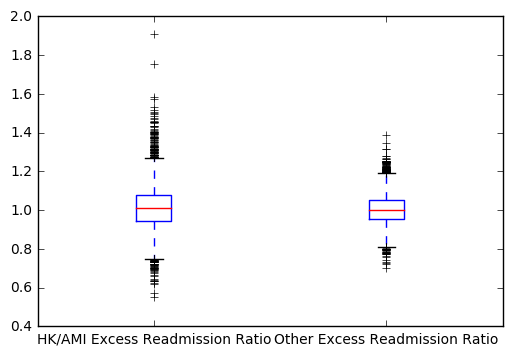

In [237]:
hkao = pd.DataFrame({
        "HK/AMI Excess Readmission Ratio" : hipkneeami, "Other Excess Readmission Ratio" : other
    })

ax =hkao.plot(kind = 'box')
ax.legend(loc=3)

In [188]:
# ttest to determine whether significant difference in Excess Readmission Ratio
# Exists between Hip-Knee/AMI and other- is significant
scipy.stats.ttest_ind(hipknee['Excess Readmission Ratio'], other['Excess Readmission Ratio'])

Ttest_indResult(statistic=6.3351290071764463, pvalue=2.4600124891712081e-10)

In [189]:
lowdischarge_other = other[(other['Number of Discharges'] > 0) & 
                                      (other['Number of Discharges']<= 100)]
highdischarge_other = other[other['Number of Discharges'] >= 1000]

In [190]:
# ttest to determine whether significant difference in Excess Readmission Ratio
# Exists between discharge number in other group- not significant
scipy.stats.ttest_ind(lowdischarge_other['Excess Readmission Ratio'], highdischarge_other['Excess Readmission Ratio'])

Ttest_indResult(statistic=1.5327297200126673, pvalue=0.1256276681324496)

In [238]:
lowdischarge_hkami = hipknee[(hipknee['Number of Discharges'] > 0) & 
                                      (hipknee['Number of Discharges']<= 100)]
highdischarge_hkami = hipknee[hipknee['Number of Discharges'] >= 1000]

In [239]:
# ttest to determine whether significant difference in Excess Readmission Ratio
# Exists between Hip-Knee/AMI low and high discharge rate - is significant
scipy.stats.ttest_ind(lowdischarge_hkami['Excess Readmission Ratio'], highdischarge_hkami['Excess Readmission Ratio'])

Ttest_indResult(statistic=11.96910048800518, pvalue=1.2523819004928409e-29)

In [240]:
lowdischarge_hkami.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,401.000000,401.000000,0.0,401.000000,401.000000,401.000000,401.000000
mean,249952.750623,70.089776,NaN,1.040062,19.894514,19.241895,15.426434
std,147063.841912,18.474070,NaN,0.071101,3.444186,3.389962,4.039208
min,10012.000000,25.000000,NaN,0.907600,7.200000,5.300000,11.000000
25%,110064.000000,56.000000,NaN,0.997100,18.100000,17.800000,12.000000
50%,230180.000000,70.000000,NaN,1.031400,20.200000,19.600000,15.000000
75%,360262.000000,86.000000,NaN,1.067100,22.000000,21.300000,18.000000
max,670047.000000,100.000000,NaN,1.495300,30.000000,28.000000,31.000000


In [241]:
highdischarge_hkami.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,175.000000,175.000000,0.0,175.000000,175.000000,175.000000,175.000000
mean,252063.342857,1464.371429,NaN,0.931189,6.795429,7.166286,92.457143
std,148799.675621,584.296265,NaN,0.147081,4.878063,4.680131,62.892603
min,10039.000000,1000.000000,NaN,0.549500,2.700000,4.100000,23.000000
25%,110017.500000,1127.000000,NaN,0.836650,4.200000,4.800000,52.000000
50%,230156.000000,1328.000000,NaN,0.938300,4.800000,5.100000,69.000000
75%,370212.500000,1612.500000,NaN,1.031150,5.750000,5.550000,104.000000
max,520138.000000,6793.000000,NaN,1.454300,21.700000,20.900000,305.000000


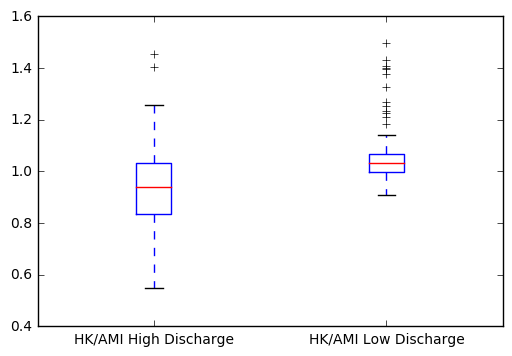

In [243]:
hkamilow = lowdischarge_hkami['Excess Readmission Ratio']
hkamihigh = highdischarge_hkami['Excess Readmission Ratio']

hka_discharge = pd.DataFrame({
        "HK/AMI Low Discharge" : hkamilow, "HK/AMI High Discharge" : hkamihigh
    })

ax =hka_discharge.plot(kind = 'box')
ax.legend(loc=3)

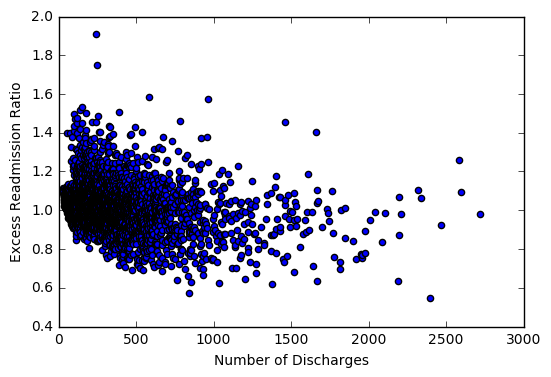

In [248]:
hipknee.plot(x = 'Number of Discharges', y='Excess Readmission Ratio', kind='scatter', xlim= (0,3000))

In [ ]:
#Conclusions: Discharge rate was only one of the factors that contribut to Excess Readmission Ratio
# the other factor is the type of injury that a patient comes in with. Based on this, the recommendations 
# would be Hospitals/facilties with small capacity (< 300) that handle AMI and hip-knee injuries should be required to 
#demonstrate upgraded resource allocation for quality care to continue operation.
